# Data Compilation

In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv('../data/articles.csv')
raw_data.head()

,pageLink,imageLink,topic,title,teaser,category
0,http://www.nrc.nl/nieuws/2022/12/24/broodkruim...,NaN,Recensie,Broodkruimelspoor langs feiten,NPR zou je wel het mekka van de audiojournalis...,nieuws
1,http://www.nrc.nl/nieuws/2022/09/23/afghaanse-...,NaN,Recensie,Afghaanse vluchtverhalen,In Kabul Falling vertellen Afghanen hoe zij de...,nieuws
2,http://www.nrc.nl/nieuws/2022/09/12/dagelijks-...,https://images.nrc.nl/OEf0PzlP_QBrt9z-6PhWRc3k...,Recensie,Dagelijks een bal des gehakts,We zitten met Paul Arnoldussen en Rudie Kagie ...,nieuws
3,http://www.nrc.nl/nieuws/2022/09/09/mysterieus...,https://images.nrc.nl/jq1Q4aN5DQagLKg96wCtkJcH...,Recensie,Mysterieus en veelvoorkomend,"In Long Covid, de schaduwpandemie onderzoeken ...",nieuws
4,http://www.nrc.nl/nieuws/2022/07/22/ontspannen...,https://images.nrc.nl/iqwgUL8xjhR6nKtt2sjTJHb5...,Recensie,Ontspannen met academici,Twee keer per week nodigt de redactie van Vox ...,nieuws


In [6]:
raw_data = raw_data[~raw_data.teaser.isna()]

In [7]:
def to_dt(page_link:str):
    p_dt = '-'.join(page_link.split('/')[4:7])
    if not p_dt.replace('-', '').isnumeric():
        return None
    return p_dt

In [8]:
raw_data['p_date'] = raw_data.pageLink.apply(lambda page_link: to_dt(page_link))

In [9]:
raw_data.p_date = pd.to_datetime(raw_data.p_date, format='%Y-%m-%d', yearfirst=True, errors='ignore')

In [10]:
raw_data['year'] = raw_data.p_date.dt.year
raw_data['month'] = raw_data.p_date.dt.month
raw_data['day'] = raw_data.p_date.dt.day
raw_data['weekday'] = raw_data.p_date.dt.weekday

In [11]:
cols = raw_data.columns[-4:]
raw_data[cols] = raw_data[cols].fillna(0)

In [12]:
raw_data[cols] = raw_data[cols].astype(int)

# Characteristics of the data

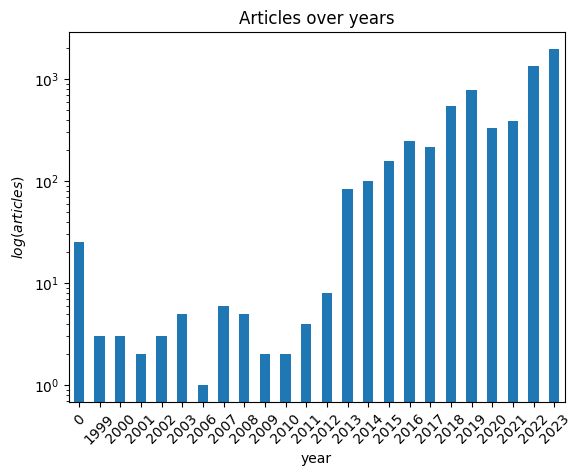

In [13]:
raw_data.year.value_counts().sort_index().plot.bar(rot=45, logy=True, ylabel='$log(articles)$', title='Articles over years');

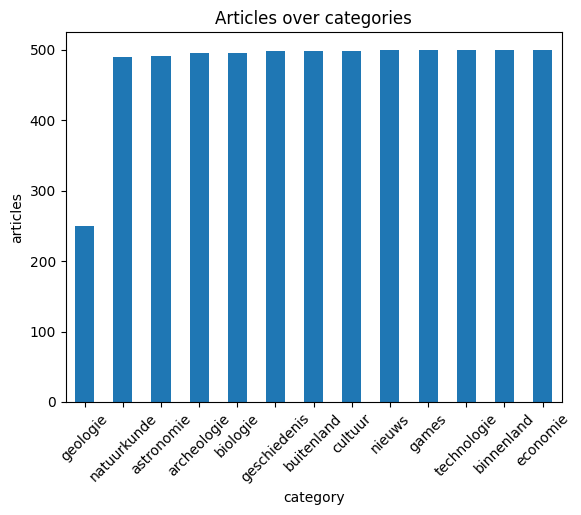

In [14]:
raw_data.category.value_counts().sort_values().plot.bar(rot=45, ylabel='articles', title='Articles over categories');

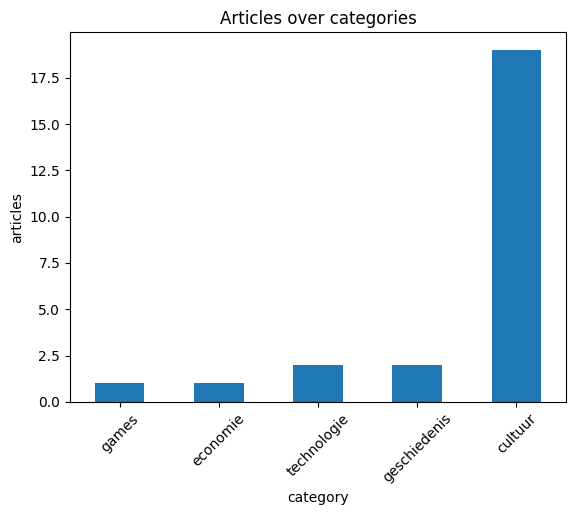

In [15]:
raw_data[raw_data.year == 0].category.value_counts().sort_values().plot.bar(rot=45, ylabel='articles', title='Articles over categories');

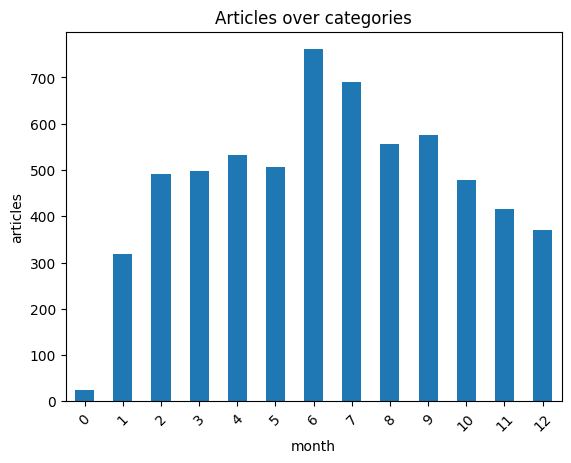

In [16]:
raw_data.month.value_counts().sort_index().plot.bar(rot=45, ylabel='articles', title='Articles over categories');

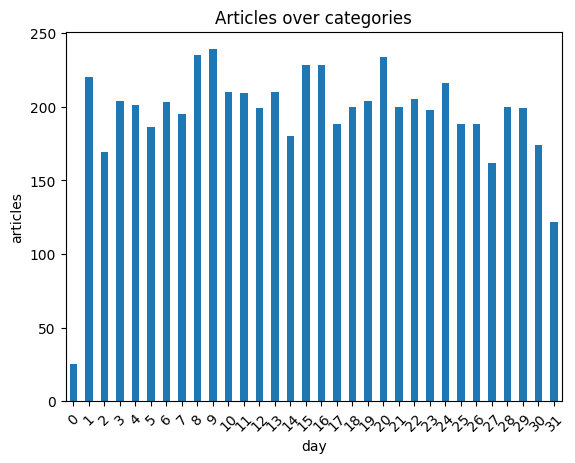

In [17]:
raw_data.day.value_counts().sort_index().plot.bar(rot=45, ylabel='articles', title='Articles over categories');

In [18]:
raw_data.to_csv('../data/articles_compiled.csv', index=False)